In [74]:
#Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
#Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


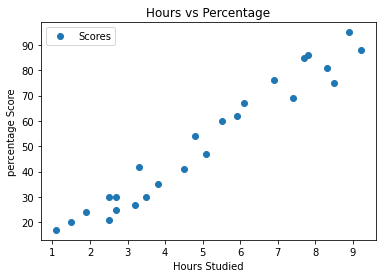

In [76]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('percentage Score')
plt.show()

# Preparing the data


In [77]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, 1].values

In [78]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [79]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

# Training the algorithm

In [81]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression()

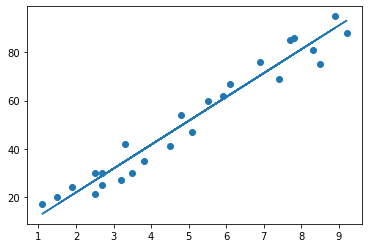

In [82]:
#Plotting the regression line
line =lreg.coef_*X+lreg.intercept_

#Plotting for the test data 
plt.scatter(X,Y)
plt.plot(X, line);
plt.show()

# Making Predictions

In [83]:
print(X_test)
y_pred = lreg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [84]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [85]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluating the model

In [86]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002975


# Some other models for this dataset

In [87]:
#DECISION TREE MODEL
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)


In [88]:
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [89]:
predict = clf.predict(X_test)

In [90]:
accuracy_score(Y_test, predict)

0.0

In [91]:
#lets try logistics Regression model
from sklearn.linear_model import LogisticRegression

In [92]:
#defining the logistic regression model
loreg = LogisticRegression(max_iter=1000)

In [93]:
#fitting the model
loreg.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [94]:
prediction = loreg.predict(X_test)
prediction

array([17, 30, 86, 30, 67], dtype=int64)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, prediction)

0.2